**COVID - 19 and X Dataset**

**Assigned dataset - 20 https://github.com/michaelofsbu/CSE-544-Datasets**

**For the X dataset, we have chosen the Chicago Crime Data**

**https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re

**Mandatory tasks**

**Q 1**

**Load Data and get statistics**

In [7]:
covid_data = pd.read_csv('20.csv')
print(covid_data.describe())

       PA confirmed   RI confirmed     PA deaths    RI deaths
count  4.380000e+02     438.000000    438.000000   438.000000
mean   2.917111e+05   39382.671233   9250.666667  1059.652968
std    3.343822e+05   41919.899696   7795.064192   776.665703
min    0.000000e+00       0.000000      0.000000     0.000000
25%    5.673300e+04   11315.750000   3692.750000   424.000000
50%    1.315735e+05   20580.000000   7645.000000  1020.000000
75%    5.069018e+05   62870.000000  12822.500000  1413.000000
max    1.038750e+06  138255.000000  25190.000000  2630.000000


In [10]:
covid_PA_confirmed = covid_data['PA confirmed']
covid_RI_confirmed = covid_data['RI confirmed']
covid_PA_deaths = covid_data['PA deaths']
covid_RI_deaths = covid_data['RI deaths']

**Check null values in data set**

In [11]:
print(covid_PA_confirmed.isnull().sum())
print(covid_RI_confirmed.isnull().sum())
print(covid_PA_deaths.isnull().sum())
print(covid_RI_deaths.isnull().sum())


0
0
0
0


**No null values observed**

**getting individual data from cumulative data and assign zero for negative confirmed cases and deaths**

In [12]:
covid_PA_confirmed = covid_PA_confirmed.diff()
covid_PA_confirmed.fillna(0, inplace=True)
covid_PA_confirmed.loc[covid_PA_confirmed<0]=0

covid_RI_confirmed = covid_RI_confirmed.diff()
covid_RI_confirmed.fillna(0, inplace=True)
covid_RI_confirmed.loc[covid_RI_confirmed<0]=0

covid_PA_deaths = covid_PA_deaths.diff().reset_index(drop=True)
covid_PA_deaths.fillna(0, inplace=True)
covid_PA_deaths.loc[covid_PA_deaths<0]=0

covid_RI_deaths = covid_RI_deaths.diff().reset_index(drop=True)
covid_RI_deaths.fillna(0, inplace=True)
covid_RI_deaths.loc[covid_RI_deaths<0]=0

In [13]:
covid_PA_confirmed = pd.concat([covid_data['Date'],covid_PA_confirmed],axis=1)
covid_RI_confirmed = pd.concat([covid_data['Date'],covid_RI_confirmed],axis=1)
covid_PA_deaths = pd.concat([covid_data['Date'],covid_PA_deaths],axis=1)
covid_RI_deaths = pd.concat([covid_data['Date'],covid_RI_deaths],axis=1)
covid_PA_confirmed.columns=['Date', 'Count']
covid_PA_deaths.columns=['Date', 'Count']
covid_RI_confirmed.columns=['Date', 'Count']
covid_RI_deaths.columns=['Date', 'Count']

**Outlier detection**

In [18]:
#### Tukey's rule to check for outliers for daily Confirmed and death cases ####
### alpha is taken as 1.5 ###
def outlier_detection(df):
    n = df.size
    df = df.sort_values(ascending=True)
    q1 = df[int(np.ceil(0.25*n))]
    q3 = df[int(np.ceil(0.75*n))]
    iqr = q3 - q1
    
    alpha = 1.5
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print('upper and lower limits for outliers: ',upper_limit,lower_limit)
    
    return df[((df < lower_limit) | (df > upper_limit))]

In [19]:
print(outlier_detection(covid_PA_confirmed['Count']))
print(outlier_detection(covid_RI_confirmed['Count']))
print(outlier_detection(covid_PA_deaths['Count']))
print(outlier_detection(covid_RI_deaths['Count']))

upper and lower limits for outliers:  24306.5 -13713.5
Series([], Name: Count, dtype: float64)
upper and lower limits for outliers:  20209.5 -11858.5
Series([], Name: Count, dtype: float64)
upper and lower limits for outliers:  660.5 -359.5
Series([], Name: Count, dtype: float64)
upper and lower limits for outliers:  233.0 -127.0
Series([], Name: Count, dtype: float64)


**No outliers found**

**- - - - -   Q 2  - - - - -**

**Q2 - iii, iv**

In [71]:

def plot_ewma(X, test, predictions):
    plt.plot(X,test,label="original")
    plt.plot(X,predictions,label="Predictions")
    plt.xlabel('Dates - 4th week of August')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()
    
class EWMA:
    def __init__(self, alpha):
        self.alpha = alpha

    def predict(self,data,test):
        y_t_hat = data['Count'][0]
        #calculating y_t_hat
        for i in range(data.shape[0]):
            y_t = data['Count'][i]
            y_t_hat = self.alpha*y_t + (1-self.alpha)*y_t_hat
        
        mse_errors = []
        mape_errors = []
        predictions = np.zeros(len(test))
        #predicting values
        for i in np.arange(len(test)):
            y_t = test['Count'][i]
            print("Date: " + str(test['Date'][i]) + " - Test Prediction: " + "{:5.3f}".format(y_t_hat) + ", Actual: " + "{:5.3f}".format(y_t))
            
            #Ignoring zero data to avoid infinite error
            if y_t!=0:
                mape_errors.append(abs(y_t_hat-y_t)*100/y_t)
                mse_errors.append((y_t_hat-y_t)**2)
            predictions[i] = y_t_hat = self.alpha*y_t + (1-self.alpha)* y_t_hat
        plot_ewma(np.array(test['Date']), test['Count'], predictions)
        print("------------------------Errors--------------------------------------")
        print("MAPE:" + "{:5.2f}".format(np.mean(mape_errors)))
        print("MSE:" + "{:5.2f}".format(np.mean(mse_errors)))     


--------------------------- EWMA(0.5) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test Prediction: 697.134, Actual: 796.000
Date: 2020-08-23 - Test Prediction: 746.567, Actual: 619.000
Date: 2020-08-24 - Test Prediction: 682.783, Actual: 426.000
Date: 2020-08-25 - Test Prediction: 554.392, Actual: 561.000
Date: 2020-08-26 - Test Prediction: 557.696, Actual: 501.000
Date: 2020-08-27 - Test Prediction: 529.348, Actual: 620.000
Date: 2020-08-28 - Test Prediction: 574.674, Actual: 835.000


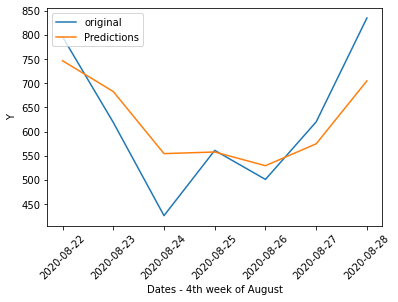

------------------------Errors--------------------------------------
MAPE:21.66
MSE:24461.59

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test Prediction: 77.676, Actual: 0.000
Date: 2020-08-23 - Test Prediction: 38.838, Actual: 0.000
Date: 2020-08-24 - Test Prediction: 19.419, Actual: 0.000
Date: 2020-08-25 - Test Prediction: 9.709, Actual: 0.000
Date: 2020-08-26 - Test Prediction: 4.855, Actual: 700.000
Date: 2020-08-27 - Test Prediction: 352.427, Actual: 0.000
Date: 2020-08-28 - Test Prediction: 176.214, Actual: 0.000


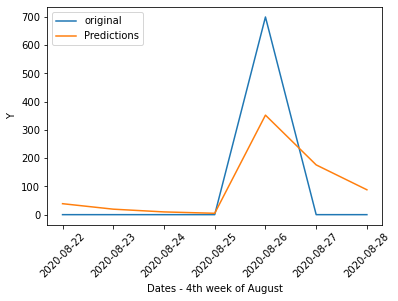

------------------------Errors--------------------------------------
MAPE:99.31
MSE:483226.95

--------------------------- EWMA(0.8) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test Prediction: 704.619, Actual: 796.000
Date: 2020-08-23 - Test Prediction: 777.724, Actual: 619.000
Date: 2020-08-24 - Test Prediction: 650.745, Actual: 426.000
Date: 2020-08-25 - Test Prediction: 470.949, Actual: 561.000
Date: 2020-08-26 - Test Prediction: 542.990, Actual: 501.000
Date: 2020-08-27 - Test Prediction: 509.398, Actual: 620.000
Date: 2020-08-28 - Test Prediction: 597.880, Actual: 835.000


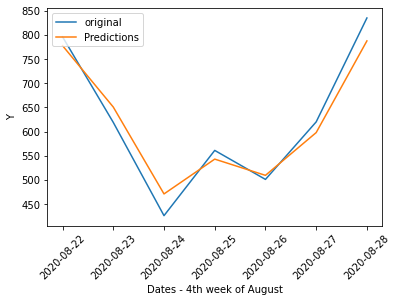

------------------------Errors--------------------------------------
MAPE:22.94
MSE:23197.88

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test Prediction: 19.712, Actual: 0.000
Date: 2020-08-23 - Test Prediction: 3.942, Actual: 0.000
Date: 2020-08-24 - Test Prediction: 0.788, Actual: 0.000
Date: 2020-08-25 - Test Prediction: 0.158, Actual: 0.000
Date: 2020-08-26 - Test Prediction: 0.032, Actual: 700.000
Date: 2020-08-27 - Test Prediction: 560.006, Actual: 0.000
Date: 2020-08-28 - Test Prediction: 112.001, Actual: 0.000


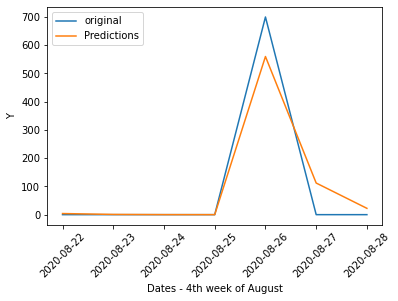

------------------------Errors--------------------------------------
MAPE:100.00
MSE:489955.85


In [72]:
# Exponentially Weighted Moving Average (Confirmed COVID Cases in August 2020)
#Predict Confirmed cases for 4th week of August with first three weeks data of August 

train_PA_confirmed = covid_PA_confirmed[(covid_PA_confirmed['Date']>='2020-08-01') & (covid_PA_confirmed['Date']<='2020-08-21')].reset_index(drop=True)
test_PA_confirmed = covid_PA_confirmed[(covid_PA_confirmed['Date']>='2020-08-22') & (covid_PA_confirmed['Date']<='2020-08-28')].reset_index(drop=True)

train_RI_confirmed = covid_RI_confirmed[(covid_RI_confirmed['Date']>='2020-08-01') & (covid_RI_confirmed['Date']<='2020-08-21')].reset_index(drop=True)
test_RI_confirmed = covid_RI_confirmed[(covid_RI_confirmed['Date']>='2020-08-22') & (covid_RI_confirmed['Date']<='2020-08-28')].reset_index(drop=True)


print("\n--------------------------- EWMA(0.5) -----------------------------\n")
print("\n-------- Predicting Pennsylvania confirmed cases --------\n")
ewma = EWMA(0.5)
ewma.predict(train_PA_confirmed,test_PA_confirmed)

print("\n-------- Predicting Rhode Island confirmed cases --------\n")
ewma = EWMA(0.5)
ewma.predict(train_RI_confirmed,test_RI_confirmed)

print("\n--------------------------- EWMA(0.8) -----------------------------\n")
print("\n-------- Predicting Pennsylvania confirmed cases --------\n")
ewma = EWMA(0.8)
ewma.predict(train_PA_confirmed,test_PA_confirmed)

print("\n-------- Predicting Rhode Island confirmed cases --------\n")
ewma = EWMA(0.8)
ewma.predict(train_RI_confirmed,test_RI_confirmed)


--------------------------- EWMA(0.5) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test Prediction: 697.134, Actual: 796.000

Date: 2020-08-23 - Test Prediction: 746.567, Actual: 619.000

Date: 2020-08-24 - Test Prediction: 682.783, Actual: 426.000

Date: 2020-08-25 - Test Prediction: 554.392, Actual: 561.000

Date: 2020-08-26 - Test Prediction: 557.696, Actual: 501.000

Date: 2020-08-27 - Test Prediction: 529.348, Actual: 620.000

Date: 2020-08-28 - Test Prediction: 574.674, Actual: 835.000

------------------------Errors--------------------------------------

MAPE:21.66
MSE:24461.59

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test Prediction: 77.676, Actual: 0.000

Date: 2020-08-23 - Test Prediction: 38.838, Actual: 0.000

Date: 2020-08-24 - Test Prediction: 19.419, Actual: 0.000

Date: 2020-08-25 - Test Prediction: 9.709, Actual: 0.000

Date: 2020-08-26 - Test Prediction: 4.855, Actual: 700.000

Date: 2020-08-27 - Test Prediction: 352.427, Actual: 0.000

Date: 2020-08-28 - Test Prediction: 176.214, Actual: 0.000

------------------------Errors--------------------------------------

MAPE:99.31
MSE:483226.95

--------------------------- EWMA(0.8) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test Prediction: 704.619, Actual: 796.000

Date: 2020-08-23 - Test Prediction: 777.724, Actual: 619.000

Date: 2020-08-24 - Test Prediction: 650.745, Actual: 426.000

Date: 2020-08-25 - Test Prediction: 470.949, Actual: 561.000

Date: 2020-08-26 - Test Prediction: 542.990, Actual: 501.000

Date: 2020-08-27 - Test Prediction: 509.398, Actual: 620.000

Date: 2020-08-28 - Test Prediction: 597.880, Actual: 835.000

------------------------Errors--------------------------------------

MAPE:22.94
MSE:23197.88

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test Prediction: 19.712, Actual: 0.000

Date: 2020-08-23 - Test Prediction: 3.942, Actual: 0.000

Date: 2020-08-24 - Test Prediction: 0.788, Actual: 0.000

Date: 2020-08-25 - Test Prediction: 0.158, Actual: 0.000

Date: 2020-08-26 - Test Prediction: 0.032, Actual: 700.000

Date: 2020-08-27 - Test Prediction: 560.006, Actual: 0.000

Date: 2020-08-28 - Test Prediction: 112.001, Actual: 0.000

------------------------Errors--------------------------------------

MAPE:100.00
MSE:489955.85


--------------------------- EWMA(0.5) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test Prediction: 19.131, Actual: 18.000
Date: 2020-08-23 - Test Prediction: 18.565, Actual: 2.000
Date: 2020-08-24 - Test Prediction: 10.283, Actual: 1.000
Date: 2020-08-25 - Test Prediction: 5.641, Actual: 26.000
Date: 2020-08-26 - Test Prediction: 15.821, Actual: 19.000
Date: 2020-08-27 - Test Prediction: 17.410, Actual: 11.000
Date: 2020-08-28 - Test Prediction: 14.205, Actual: 20.000


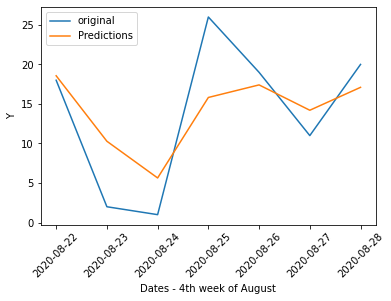

------------------------Errors--------------------------------------
MAPE:277.87
MSE:123.02

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test Prediction: 0.888, Actual: 0.000
Date: 2020-08-23 - Test Prediction: 0.444, Actual: 0.000
Date: 2020-08-24 - Test Prediction: 0.222, Actual: 0.000
Date: 2020-08-25 - Test Prediction: 0.111, Actual: 0.000
Date: 2020-08-26 - Test Prediction: 0.055, Actual: 12.000
Date: 2020-08-27 - Test Prediction: 6.028, Actual: 0.000
Date: 2020-08-28 - Test Prediction: 3.014, Actual: 0.000


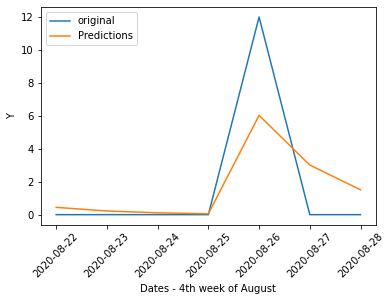

------------------------Errors--------------------------------------
MAPE:99.54
MSE:142.67

--------------------------- EWMA(0.8) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test Prediction: 19.369, Actual: 18.000
Date: 2020-08-23 - Test Prediction: 18.274, Actual: 2.000
Date: 2020-08-24 - Test Prediction: 5.255, Actual: 1.000
Date: 2020-08-25 - Test Prediction: 1.851, Actual: 26.000
Date: 2020-08-26 - Test Prediction: 21.170, Actual: 19.000
Date: 2020-08-27 - Test Prediction: 19.434, Actual: 11.000
Date: 2020-08-28 - Test Prediction: 12.687, Actual: 20.000


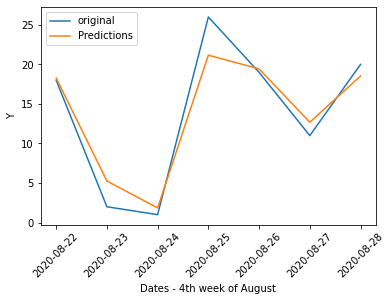

------------------------Errors--------------------------------------
MAPE:209.19
MSE:142.47

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test Prediction: 0.224, Actual: 0.000
Date: 2020-08-23 - Test Prediction: 0.045, Actual: 0.000
Date: 2020-08-24 - Test Prediction: 0.009, Actual: 0.000
Date: 2020-08-25 - Test Prediction: 0.002, Actual: 0.000
Date: 2020-08-26 - Test Prediction: 0.000, Actual: 12.000
Date: 2020-08-27 - Test Prediction: 9.600, Actual: 0.000
Date: 2020-08-28 - Test Prediction: 1.920, Actual: 0.000


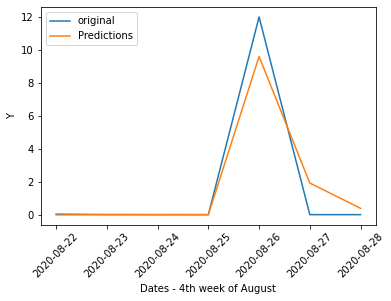

------------------------Errors--------------------------------------
MAPE:100.00
MSE:143.99


In [73]:
# Exponentially Weighted Moving Average (Confirmed COVID Cases in August 2020)
#Predict deaths for 4th week of August with first three weeks data of August 

train_PA_deaths = covid_PA_deaths[(covid_PA_deaths['Date']>='2020-08-01') & (covid_PA_deaths['Date']<='2020-08-21')].reset_index(drop=True)
test_PA_deaths = covid_PA_deaths[(covid_PA_deaths['Date']>='2020-08-22') & (covid_PA_deaths['Date']<='2020-08-28')].reset_index(drop=True)

train_RI_deaths = covid_RI_deaths[(covid_RI_deaths['Date']>='2020-08-01') & (covid_RI_deaths['Date']<='2020-08-21')].reset_index(drop=True)
test_RI_deaths = covid_RI_deaths[(covid_RI_deaths['Date']>='2020-08-22') & (covid_RI_deaths['Date']<='2020-08-28')].reset_index(drop=True)

print("\n--------------------------- EWMA(0.5) -----------------------------\n")
print("\n-------- Predicting Pennsylvania deaths --------\n")
ewma = EWMA(0.5)
ewma.predict(train_PA_deaths,test_PA_deaths)
ewma = EWMA(0.5)

print("\n-------- Predicting Rhode Island deaths --------\n")
ewma.predict(train_RI_deaths,test_RI_deaths)

print("\n--------------------------- EWMA(0.8) -----------------------------\n")
print("\n-------- Predicting Pennsylvania deaths --------\n")
ewma = EWMA(0.8)
ewma.predict(train_PA_deaths,test_PA_deaths)

ewma = EWMA(0.8)
print("\n-------- Predicting Rhode Island deaths --------\n")
ewma.predict(train_RI_deaths,test_RI_deaths)


--------------------------- EWMA(0.5) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test Prediction: 19.131, Actual: 18.000

Date: 2020-08-23 - Test Prediction: 18.565, Actual: 2.000

Date: 2020-08-24 - Test Prediction: 10.283, Actual: 1.000

Date: 2020-08-25 - Test Prediction: 5.641, Actual: 26.000

Date: 2020-08-26 - Test Prediction: 15.821, Actual: 19.000

Date: 2020-08-27 - Test Prediction: 17.410, Actual: 11.000

Date: 2020-08-28 - Test Prediction: 14.205, Actual: 20.000

------------------------Errors--------------------------------------

MAPE:277.87
MSE:123.02

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test Prediction: 0.888, Actual: 0.000

Date: 2020-08-23 - Test Prediction: 0.444, Actual: 0.000

Date: 2020-08-24 - Test Prediction: 0.222, Actual: 0.000

Date: 2020-08-25 - Test Prediction: 0.111, Actual: 0.000

Date: 2020-08-26 - Test Prediction: 0.055, Actual: 12.000

Date: 2020-08-27 - Test Prediction: 6.028, Actual: 0.000

Date: 2020-08-28 - Test Prediction: 3.014, Actual: 0.000

------------------------Errors--------------------------------------

MAPE:99.54
MSE:142.67

--------------------------- EWMA(0.8) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test Prediction: 19.369, Actual: 18.000

Date: 2020-08-23 - Test Prediction: 18.274, Actual: 2.000

Date: 2020-08-24 - Test Prediction: 5.255, Actual: 1.000

Date: 2020-08-25 - Test Prediction: 1.851, Actual: 26.000

Date: 2020-08-26 - Test Prediction: 21.170, Actual: 19.000

Date: 2020-08-27 - Test Prediction: 19.434, Actual: 11.000

Date: 2020-08-28 - Test Prediction: 12.687, Actual: 20.000

------------------------Errors--------------------------------------

MAPE:209.19
MSE:142.47

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test Prediction: 0.224, Actual: 0.000

Date: 2020-08-23 - Test Prediction: 0.045, Actual: 0.000

Date: 2020-08-24 - Test Prediction: 0.009, Actual: 0.000

Date: 2020-08-25 - Test Prediction: 0.002, Actual: 0.000

Date: 2020-08-26 - Test Prediction: 0.000, Actual: 12.000

Date: 2020-08-27 - Test Prediction: 9.600, Actual: 0.000

Date: 2020-08-28 - Test Prediction: 1.920, Actual: 0.000

------------------------Errors--------------------------------------

MAPE:100.00
MSE:143.99

**Q2 - i ii**

In [88]:
def plot_ar(X, test, predictions):
    plt.plot(X,test,label="original")
    plt.plot(X,predictions,label="Predictions")
    plt.xlabel('Dates - 4th week of August')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()
    
class AR:
    def __init__(self, p):
        self.p = p
        
    def predict(self, train, test):
        test_dates = np.array(test['Date'])
        test_counts = np.array(test['Count'])
        data_counts = np.hstack([train['Count'], test_counts])
        p = self.p
        t = data_counts.shape[0] - test_counts.shape[0] 
        error = []
        mse = []
        predictions = np.zeros(test.shape[0])
        
        for i in range(t,t+test_counts.shape[0]):
            testx = [1]
            testx = np.hstack([[1], data_counts[i-p:i]])
            #calculating beta
            X = []
            Y = []
            for j in range(i):
                if(j+p < i):
                    X.append([1])
                    X[j] = X[j]+list(data_counts[j:j+p])
                    Y.append(data_counts[j+p])
                else:
                    break
            beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))                        
            
            y_t_hat = predictions[i-t] = np.dot(testx,beta)
            y_t = data_counts[i]
            
            #Ignoring zero data to avoid infinite error

            if y_t!=0:
                error.append(abs(y_t_hat-y_t)*100/y_t)
                mse.append((y_t_hat - y_t)**2)
            print("Date: " + str(test_dates[i-t]) + " - Test prediction: " + "{:5.3f}".format(predictions[i-t]) + " | Actual: " + str(test_counts[i-t]))
            
            
        plot_ar(test_dates, test_counts, predictions)
        print("------------------------Errors--------------------------------------")

        print("MAPE: " + "{:5.3f}".format(np.mean(error)))
        print("MSE : " + "{:5.3f}".format(np.mean(mse)))
        return np.mean(error)



--------------------------- AR(3) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test prediction: 795.688 | Actual: 796.0
Date: 2020-08-23 - Test prediction: 737.243 | Actual: 619.0
Date: 2020-08-24 - Test prediction: 760.136 | Actual: 426.0
Date: 2020-08-25 - Test prediction: 637.590 | Actual: 561.0
Date: 2020-08-26 - Test prediction: 655.719 | Actual: 501.0
Date: 2020-08-27 - Test prediction: 670.987 | Actual: 620.0
Date: 2020-08-28 - Test prediction: 653.981 | Actual: 835.0


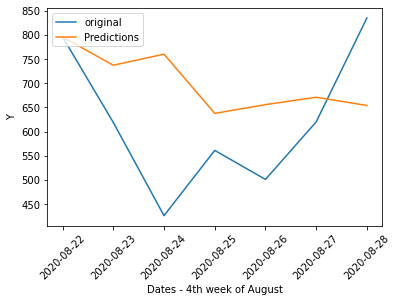

------------------------Errors--------------------------------------
MAPE: 24.573
MSE : 27257.157

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test prediction: 12.529 | Actual: 0.0
Date: 2020-08-23 - Test prediction: 192.698 | Actual: 0.0
Date: 2020-08-24 - Test prediction: 175.213 | Actual: 0.0
Date: 2020-08-25 - Test prediction: 160.637 | Actual: 0.0
Date: 2020-08-26 - Test prediction: 148.300 | Actual: 700.0
Date: 2020-08-27 - Test prediction: -15.950 | Actual: 0.0
Date: 2020-08-28 - Test prediction: -15.944 | Actual: 0.0


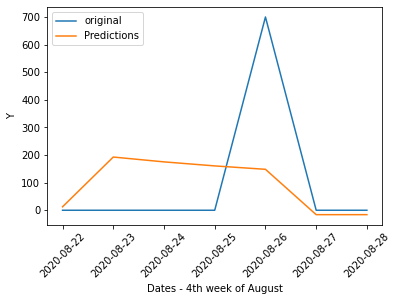

------------------------Errors--------------------------------------
MAPE: 78.814
MSE : 304372.448

--------------------------- AR(5) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test prediction: 806.785 | Actual: 796.0
Date: 2020-08-23 - Test prediction: 774.646 | Actual: 619.0
Date: 2020-08-24 - Test prediction: 739.230 | Actual: 426.0
Date: 2020-08-25 - Test prediction: 586.330 | Actual: 561.0
Date: 2020-08-26 - Test prediction: 585.629 | Actual: 501.0
Date: 2020-08-27 - Test prediction: 711.559 | Actual: 620.0
Date: 2020-08-28 - Test prediction: 680.020 | Actual: 835.0


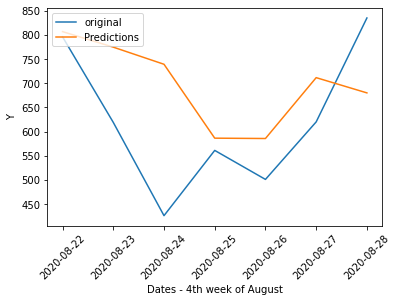

------------------------Errors--------------------------------------
MAPE: 22.109
MSE : 23237.213

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test prediction: 21.037 | Actual: 0.0
Date: 2020-08-23 - Test prediction: 21.022 | Actual: 0.0
Date: 2020-08-24 - Test prediction: 21.007 | Actual: 0.0
Date: 2020-08-25 - Test prediction: 322.942 | Actual: 0.0
Date: 2020-08-26 - Test prediction: 258.800 | Actual: 700.0
Date: 2020-08-27 - Test prediction: -28.212 | Actual: 0.0
Date: 2020-08-28 - Test prediction: -28.187 | Actual: 0.0


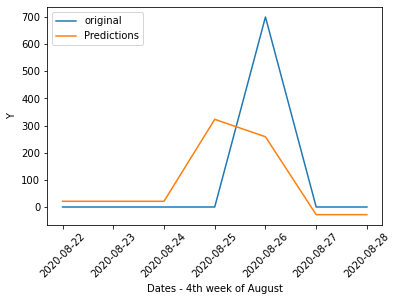

------------------------Errors--------------------------------------
MAPE: 63.029
MSE : 194657.654


63.02860611581964

In [89]:
# Auto Regression: (Confirmed COVID Cases in August 2020)
#Predict deaths for 4th week of August with first three weeks data of August 

train_PA_confirmed = covid_PA_confirmed[(covid_PA_confirmed['Date']>='2020-08-01') & (covid_PA_confirmed['Date']<='2020-08-21')].reset_index(drop=True)
test_PA_confirmed = covid_PA_confirmed[(covid_PA_confirmed['Date']>='2020-08-22') & (covid_PA_confirmed['Date']<='2020-08-28')].reset_index(drop=True)

train_RI_confirmed = covid_RI_confirmed[(covid_RI_confirmed['Date']>='2020-08-01') & (covid_RI_confirmed['Date']<='2020-08-21')].reset_index(drop=True)
test_RI_confirmed = covid_RI_confirmed[(covid_RI_confirmed['Date']>='2020-08-22') & (covid_RI_confirmed['Date']<='2020-08-28')].reset_index(drop=True)

print("\n--------------------------- AR(3) -----------------------------\n")

print("\n-------- Predicting Pennsylvania confirmed cases --------\n")
ar3 = AR(3)
ar3.predict(train_PA_confirmed,test_PA_confirmed)

print("\n-------- Predicting Rhode Island confirmed cases --------\n")
ar3 = AR(3)
ar3.predict(train_RI_confirmed,test_RI_confirmed)

print("\n--------------------------- AR(5) -----------------------------\n")

print("\n-------- Predicting Pennsylvania confirmed cases --------\n")
ar3 = AR(5)
ar3.predict(train_PA_confirmed,test_PA_confirmed)

print("\n-------- Predicting Rhode Island confirmed cases --------\n")
ar3 = AR(5)
ar3.predict(train_RI_confirmed,test_RI_confirmed)



--------------------------- AR(3) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test prediction: 795.688 | Actual: 796.0

Date: 2020-08-23 - Test prediction: 737.243 | Actual: 619.0

Date: 2020-08-24 - Test prediction: 760.136 | Actual: 426.0

Date: 2020-08-25 - Test prediction: 637.590 | Actual: 561.0

Date: 2020-08-26 - Test prediction: 655.719 | Actual: 501.0

Date: 2020-08-27 - Test prediction: 670.987 | Actual: 620.0

Date: 2020-08-28 - Test prediction: 653.981 | Actual: 835.0

------------------------Errors--------------------------------------

MAPE: 24.573
MSE : 27257.157

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test prediction: 12.529 | Actual: 0.0

Date: 2020-08-23 - Test prediction: 192.698 | Actual: 0.0

Date: 2020-08-24 - Test prediction: 175.213 | Actual: 0.0

Date: 2020-08-25 - Test prediction: 160.637 | Actual: 0.0

Date: 2020-08-26 - Test prediction: 148.300 | Actual: 700.0

Date: 2020-08-27 - Test prediction: -15.950 | Actual: 0.0

Date: 2020-08-28 - Test prediction: -15.944 | Actual: 0.0

------------------------Errors--------------------------------------

MAPE: 78.814
MSE : 304372.448

--------------------------- AR(5) -----------------------------


-------- Predicting Pennsylvania confirmed cases --------

Date: 2020-08-22 - Test prediction: 806.785 | Actual: 796.0

Date: 2020-08-23 - Test prediction: 774.646 | Actual: 619.0

Date: 2020-08-24 - Test prediction: 739.230 | Actual: 426.0

Date: 2020-08-25 - Test prediction: 586.330 | Actual: 561.0

Date: 2020-08-26 - Test prediction: 585.629 | Actual: 501.0

Date: 2020-08-27 - Test prediction: 711.559 | Actual: 620.0

Date: 2020-08-28 - Test prediction: 680.020 | Actual: 835.0

------------------------Errors--------------------------------------

MAPE: 22.109
MSE : 23237.213

-------- Predicting Rhode Island confirmed cases --------

Date: 2020-08-22 - Test prediction: 21.037 | Actual: 0.0

Date: 2020-08-23 - Test prediction: 21.022 | Actual: 0.0

Date: 2020-08-24 - Test prediction: 21.007 | Actual: 0.0

Date: 2020-08-25 - Test prediction: 322.942 | Actual: 0.0

Date: 2020-08-26 - Test prediction: 258.800 | Actual: 700.0

Date: 2020-08-27 - Test prediction: -28.212 | Actual: 0.0

Date: 2020-08-28 - Test prediction: -28.187 | Actual: 0.0

------------------------Errors--------------------------------------

MAPE: 63.029
MSE : 194657.654


--------------------------- AR(3) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test prediction: 17.888 | Actual: 18.0
Date: 2020-08-23 - Test prediction: 19.717 | Actual: 2.0
Date: 2020-08-24 - Test prediction: 16.444 | Actual: 1.0
Date: 2020-08-25 - Test prediction: 17.587 | Actual: 26.0
Date: 2020-08-26 - Test prediction: 26.527 | Actual: 19.0
Date: 2020-08-27 - Test prediction: 20.524 | Actual: 11.0
Date: 2020-08-28 - Test prediction: 14.622 | Actual: 20.0


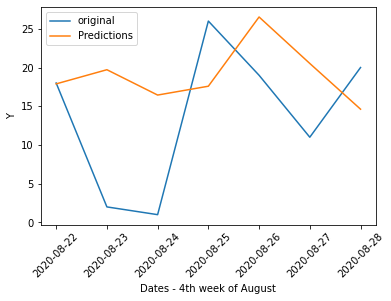

------------------------Errors--------------------------------------
MAPE: 373.762
MSE : 114.213

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test prediction: 0.970 | Actual: 0.0
Date: 2020-08-23 - Test prediction: 2.213 | Actual: 0.0
Date: 2020-08-24 - Test prediction: 2.016 | Actual: 0.0
Date: 2020-08-25 - Test prediction: 1.851 | Actual: 0.0
Date: 2020-08-26 - Test prediction: 1.711 | Actual: 12.0
Date: 2020-08-27 - Test prediction: 3.749 | Actual: 0.0
Date: 2020-08-28 - Test prediction: -0.030 | Actual: 0.0


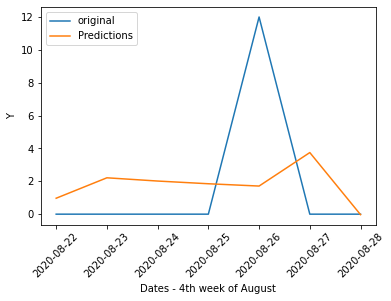

------------------------Errors--------------------------------------
MAPE: 85.742
MSE : 105.865

--------------------------- AR(5) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test prediction: 21.082 | Actual: 18.0
Date: 2020-08-23 - Test prediction: 14.471 | Actual: 2.0
Date: 2020-08-24 - Test prediction: 18.595 | Actual: 1.0
Date: 2020-08-25 - Test prediction: 24.901 | Actual: 26.0
Date: 2020-08-26 - Test prediction: 29.952 | Actual: 19.0
Date: 2020-08-27 - Test prediction: 24.052 | Actual: 11.0
Date: 2020-08-28 - Test prediction: 24.223 | Actual: 20.0


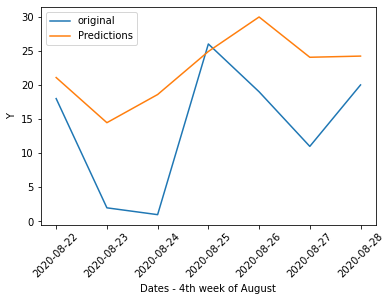

------------------------Errors--------------------------------------
MAPE: 371.691
MSE : 111.996

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test prediction: 2.226 | Actual: 0.0
Date: 2020-08-23 - Test prediction: 2.228 | Actual: 0.0
Date: 2020-08-24 - Test prediction: 0.909 | Actual: 0.0
Date: 2020-08-25 - Test prediction: 2.938 | Actual: 0.0
Date: 2020-08-26 - Test prediction: 2.548 | Actual: 12.0
Date: 2020-08-27 - Test prediction: 4.419 | Actual: 0.0
Date: 2020-08-28 - Test prediction: -0.202 | Actual: 0.0


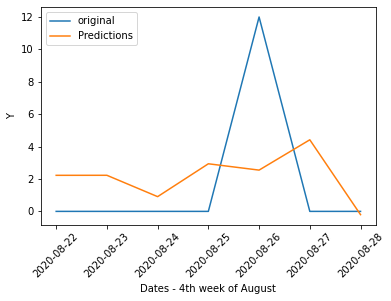

------------------------Errors--------------------------------------
MAPE: 78.769
MSE : 89.346


78.76895927863184

In [90]:
# Auto Regression: (Confirmed COVID Cases in March 2020)
# time series for the month of March (03/01/2020 to 03/31/2020)
# we will predict Confirmed Covid Cases
# for all Counties
# print("Auto Regression: (Confirmed COVID Cases in March 2020)")
train_PA_deaths = covid_PA_deaths[(covid_PA_deaths['Date']>='2020-08-01') & (covid_PA_deaths['Date']<='2020-08-21')].reset_index(drop=True)
test_PA_deaths = covid_PA_deaths[(covid_PA_deaths['Date']>='2020-08-22') & (covid_PA_deaths['Date']<='2020-08-28')].reset_index(drop=True)

train_RI_deaths = covid_RI_deaths[(covid_RI_deaths['Date']>='2020-08-01') & (covid_RI_deaths['Date']<='2020-08-21')].reset_index(drop=True)
test_RI_deaths = covid_RI_deaths[(covid_RI_deaths['Date']>='2020-08-22') & (covid_RI_deaths['Date']<='2020-08-28')].reset_index(drop=True)

print("\n--------------------------- AR(3) -----------------------------\n")

print("\n-------- Predicting Pennsylvania deaths --------\n")
ar3 = AR(3)
ar3.predict(train_PA_deaths,test_PA_deaths)

print("\n-------- Predicting Rhode Island deaths --------\n")
ar3 = AR(3)
ar3.predict(train_RI_deaths,test_RI_deaths)

print("\n--------------------------- AR(5) -----------------------------\n")

print("\n-------- Predicting Pennsylvania deaths --------\n")
ar3 = AR(5)
ar3.predict(train_PA_deaths,test_PA_deaths)

print("\n-------- Predicting Rhode Island deaths --------\n")
ar3 = AR(5)
ar3.predict(train_RI_deaths,test_RI_deaths)



--------------------------- AR(3) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test prediction: 17.888 | Actual: 18.0

Date: 2020-08-23 - Test prediction: 19.717 | Actual: 2.0

Date: 2020-08-24 - Test prediction: 16.444 | Actual: 1.0

Date: 2020-08-25 - Test prediction: 17.587 | Actual: 26.0

Date: 2020-08-26 - Test prediction: 26.527 | Actual: 19.0

Date: 2020-08-27 - Test prediction: 20.524 | Actual: 11.0

Date: 2020-08-28 - Test prediction: 14.622 | Actual: 20.0


------------------------Errors--------------------------------------

MAPE: 373.762
MSE : 114.213

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test prediction: 0.970 | Actual: 0.0

Date: 2020-08-23 - Test prediction: 2.213 | Actual: 0.0

Date: 2020-08-24 - Test prediction: 2.016 | Actual: 0.0

Date: 2020-08-25 - Test prediction: 1.851 | Actual: 0.0

Date: 2020-08-26 - Test prediction: 1.711 | Actual: 12.0

Date: 2020-08-27 - Test prediction: 3.749 | Actual: 0.0

Date: 2020-08-28 - Test prediction: -0.030 | Actual: 0.0


------------------------Errors--------------------------------------

MAPE: 85.742
MSE : 105.865

--------------------------- AR(5) -----------------------------


-------- Predicting Pennsylvania deaths --------

Date: 2020-08-22 - Test prediction: 21.082 | Actual: 18.0

Date: 2020-08-23 - Test prediction: 14.471 | Actual: 2.0

Date: 2020-08-24 - Test prediction: 18.595 | Actual: 1.0

Date: 2020-08-25 - Test prediction: 24.901 | Actual: 26.0

Date: 2020-08-26 - Test prediction: 29.952 | Actual: 19.0

Date: 2020-08-27 - Test prediction: 24.052 | Actual: 11.0

Date: 2020-08-28 - Test prediction: 24.223 | Actual: 20.0

------------------------Errors--------------------------------------

MAPE: 371.691
MSE : 111.996

-------- Predicting Rhode Island deaths --------

Date: 2020-08-22 - Test prediction: 2.226 | Actual: 0.0

Date: 2020-08-23 - Test prediction: 2.228 | Actual: 0.0

Date: 2020-08-24 - Test prediction: 0.909 | Actual: 0.0

Date: 2020-08-25 - Test prediction: 2.938 | Actual: 0.0

Date: 2020-08-26 - Test prediction: 2.548 | Actual: 12.0

Date: 2020-08-27 - Test prediction: 4.419 | Actual: 0.0

Date: 2020-08-28 - Test prediction: -0.202 | Actual: 0.0

------------------------Errors--------------------------------------

MAPE: 78.769
MSE : 89.346